In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#define : Eda for the data
#Import the dat - checking the basic dimensions etc.

In [2]:
df=pd.read_csv("C:\\Users\\HP\\Desktop\\DATA\\train.tsv",sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [4]:
#to split teh data in to test and train by using sklearn
from sklearn.model_selection import train_test_split

In [5]:
train,test=train_test_split(df,test_size=0.2)

In [6]:
train.shape

(1186028, 8)

In [7]:
test.shape

(296507, 8)

In [8]:
train=df.sample(frac=0.8,random_state=200)# random state is a sees value
test=df.drop(train.index)

In [9]:
print(df.shape,train.shape, test.shape)

(1482535, 8) (1186028, 8) (296507, 8)


In [10]:
test.columns  # to find out teh columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [11]:
#Eda 1:
#no.of rows 1482535
#no.of colums 8
#'train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
 #     'price', 'shipping', 'item_description'

In [12]:
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [13]:
train['shipping'].nunique()

2

In [14]:
#ed2
#train_id               int64
#name                  object
#item_condition_id      int64
#category_name         object
#brand_name            object
#price                float64
#shipping               int64
#item_description      object

#quality of data - missing values, distribution of price(outliers),
#distribution of category names


In [15]:
df.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [16]:
num_missing=train.isnull().sum()

In [17]:
test_missing=test.isnull().sum()

In [18]:
num_missing/len(train)   # the ratio of the missing values for the training data

train_id             0.000000
name                 0.000000
item_condition_id    0.000000
category_name        0.004240
brand_name           0.426817
price                0.000000
shipping             0.000000
item_description     0.000003
dtype: float64

In [19]:
test_missing/len(test)

train_id             0.000000
name                 0.000000
item_condition_id    0.000000
category_name        0.004378
brand_name           0.426516
price                0.000000
shipping             0.000000
item_description     0.000000
dtype: float64

In [20]:
print(round(train.describe(),2),round(test.describe(),2))
#getting the data of train and test description and we are trying to roundup the decimal values to 2

         train_id  item_condition_id       price    shipping
count  1186028.00         1186028.00  1186028.00  1186028.00
mean    741584.03               1.91       26.73        0.45
std     427980.55               0.90       38.64        0.50
min          0.00               1.00        0.00        0.00
25%     371228.50               1.00       10.00        0.00
50%     741432.00               2.00       17.00        0.00
75%    1112302.25               3.00       29.00        1.00
max    1482533.00               5.00     2009.00        1.00          train_id  item_condition_id      price   shipping
count   296507.00          296507.00  296507.00  296507.00
mean    739998.86               1.91      26.77       0.45
std     427931.84               0.90      38.36       0.50
min          2.00               1.00       0.00       0.00
25%     368283.50               1.00      10.00       0.00
50%     740669.00               2.00      17.00       0.00
75%    1110367.50               3.00  

In [21]:
#EDA 4
# price :the overall price is low averaging ~ $26 , 75% of values are below $30
#95% (mean+2*std)of the values will lie between 0~ $65.19
 
26.73+2*38.64

104.01

In [61]:
train.shape

(1186028, 8)

In [62]:
bins = np.linspace(min(train["price"]), max(train["price"]), 4)
bins

array([   0.        ,  669.66666667, 1339.33333333, 2009.        ])

In [63]:
group_names = ['Low', 'Medium', 'High']

In [134]:
train['price-binned'] = pd.cut(train['price'], bins, labels=group_names, include_lowest=True )
train[['price','price-binned']].head()

,price,price-binned
104570,15.0,Low
1182322,12.0,Low
137711,5.0,Low
377634,24.0,Low
1369185,34.0,Low


Text(0.5, 1.0, 'price bins')

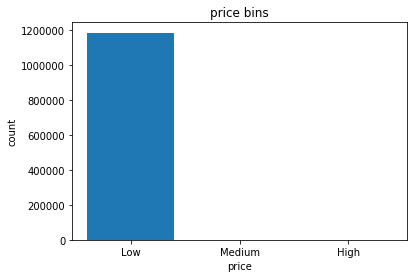

In [66]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, train["price-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price bins")

In [68]:
train_n=train[train['price']<=104.1]

In [69]:
p=train_n['price'].sum()

In [70]:
p

25649824.0

In [71]:
train_n.shape

(1153964, 9)

In [72]:
bins = np.linspace(min(train_n["price"]), max(train_n["price"]), 4)
bins

array([  0.        ,  34.66666667,  69.33333333, 104.        ])

In [73]:
group_names = ['Low', 'Medium', 'High']

In [135]:
train_n['price-binned_n'] = pd.cut(train_n['price'], bins, labels=group_names, include_lowest=True )
train_n[['price','price-binned_n']].head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,price,price-binned_n
104570,15.0,Low
1182322,12.0,Low
137711,5.0,Low
377634,24.0,Low
1369185,34.0,Low


Text(0.5, 1.0, 'price bins')

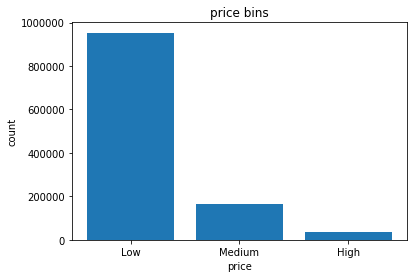

In [75]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, train_n["price-binned_n"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price bins")

In [31]:
train_n.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          4909
brand_name           499157
price                     0
shipping                  0
item_description          4
dtype: int64

In [34]:
up_d=train_n.fillna('others')

In [35]:
up_d.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64

In [79]:
update_cat=up_d.groupby('category_name')['price'].sum()
v=update_cat/p
sort=v.sort_values(axis=0,ascending=False)
sort.head(10)

category_name
Women/Athletic Apparel/Pants, Tights, Leggings    0.059595
Women/Tops & Blouses/T-Shirts                     0.027164
Women/Shoes/Boots                                 0.020049
Beauty/Makeup/Face                                0.019039
Electronics/Video Games & Consoles/Games          0.017127
Men/Shoes/Athletic                                0.016648
Beauty/Makeup/Lips                                0.016537
Women/Women's Handbags/Shoulder Bag               0.015056
Beauty/Makeup/Makeup Palettes                     0.014245
Women/Shoes/Athletic                              0.014219
Name: price, dtype: float64

In [104]:
update=up_d.groupby('brand_name')['price'].sum()
b=update/p
sort=b.sort_values(axis=0,ascending=False)
sort.head(10)

brand_name
others               0.368325
Nike                 0.046350
PINK                 0.041117
Victoria's Secret    0.032901
LuLaRoe              0.031038
Lululemon            0.018250
Michael Kors         0.016473
Rae Dunn             0.012431
Nintendo             0.011270
Coach                0.010727
Name: price, dtype: float64

In [105]:
up_10=up_d.head(10)

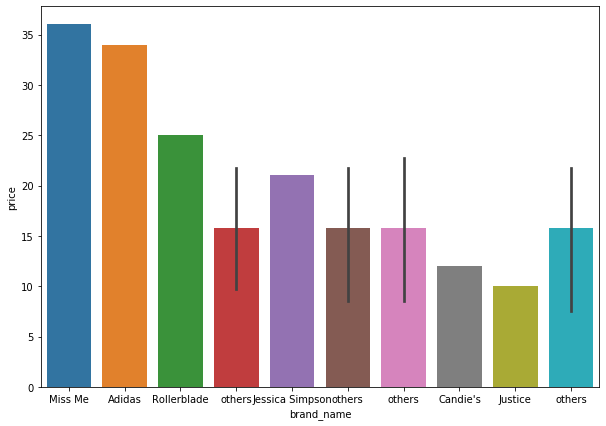

In [110]:
#update_brand=
plt.figure(figsize=(10,7))
sc=sns.barplot(x="brand_name", y="price", data=up_10,order=up_10.sort_values('price',ascending = False).brand_name)

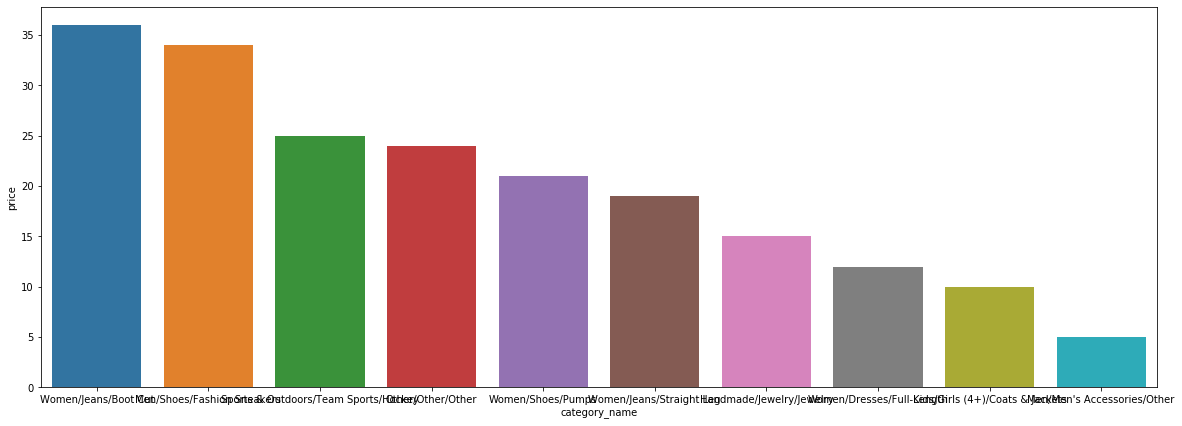

In [118]:
plt.figure(figsize=(20,7))
sc=sns.barplot(x="category_name", y="price", data=up_10,order=up_10.sort_values('price',ascending = False).category_name)

In [24]:
train['price'].count()

1186028

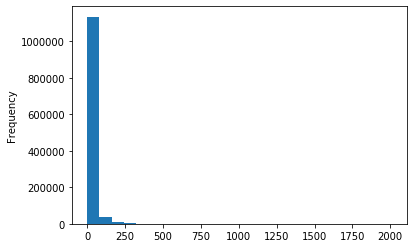

In [25]:
train['price'].plot.hist(bins=25)

In [26]:
train.drop(train[train['price']>=104.1].index,inplace=True)
#after droping all the values greater than the 104.1 from the data frame

In [28]:
train['price'].count()
print('before:1186028','after:1153964')
#these are the value count of the price after droping
#before droping the values the count is(1186028),and after the droping the values the value count is (1153964)

before:1186028 after:1153964


In [29]:
train['price'].nunique()
#the no.of unique values in the list is:144

144

In [30]:
train.shape
#gives actual shape of the set after droping some values

(1153964, 8)

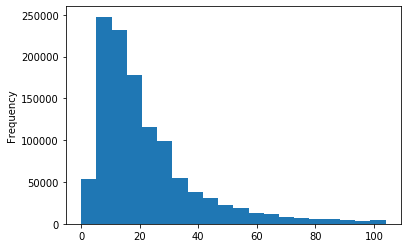

In [50]:
train_n['price'].plot.hist(bins=20)
#this plot is after the drop of the values 

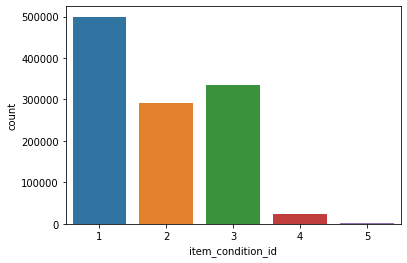

In [51]:
sns.countplot(x='item_condition_id',data=train_n)

In [37]:
#plt.scatter(train['price'])
round(train['price'].describe(),2)

count    1153964.00
mean          22.23
std           17.35
min            0.00
25%           10.00
50%           16.00
75%           28.00
max          104.00
Name: price, dtype: float64

In [38]:
train['item_condition_id'].unique()

array([1, 3, 2, 4, 5], dtype=int64)

In [39]:
train.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [40]:
# Rows containing duplicate data
duplicate_rows_train = train[train.duplicated()]
print("number of duplicate rows: ", duplicate_rows_train.shape)

number of duplicate rows:  (0, 8)


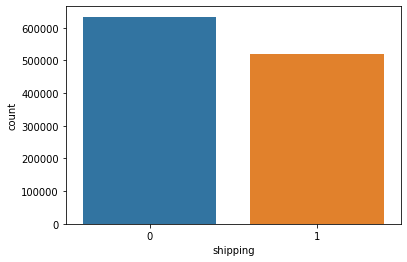

In [59]:
sns.countplot(x='shipping',data=train)

In [53]:
train['category_name'].unique()
train['category_name'].nunique()
print("No.of unique variables:"+str(train['category_name'].nunique()))

No.of unique variables:1268


In [54]:
train['brand_name'].unique()
train['brand_name'].nunique()
print("No.of unique variables:"+str(train['brand_name'].nunique()))

No.of unique variables:4506


In [57]:
train['category_name'].isnull().sum()
train['category_name'].isnull().sum()/len(train)
((train['category_name'].isnull().sum()/len(train)).round(2))*100

print("sum of null values:"+str(train['category_name'].isnull().sum()),"percentage of the null values:"+str(train['category_name'].isnull().sum()/len(train)))    

sum of null values:4909 percentage of the null values:0.004254032188179181


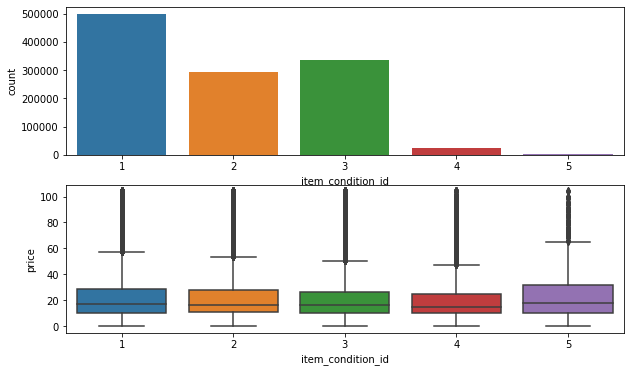

In [140]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = train_n, x = 'item_condition_id', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = train_n, x='item_condition_id', y='price' , ax = ax2)